<a href="https://colab.research.google.com/github/ShreeramMuthudev/SENTIMENTAL-ANALYSIS-/blob/main/SENTIMENTAANALYSIS_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/a1_RestaurantReviews_HistoricDump.csv')


In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


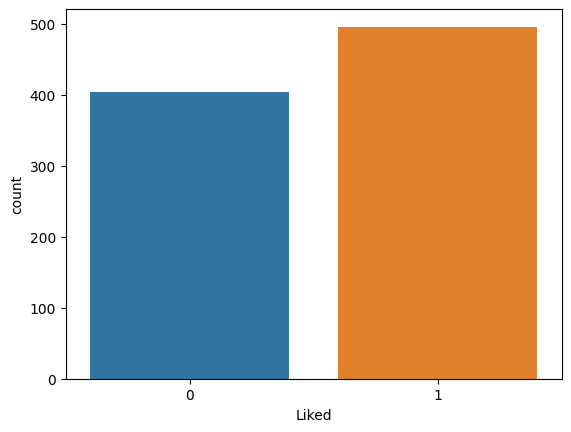

In [ ]:
sns.countplot(x ='Liked', data = data)
plt.show()

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In simple words, this code snippet is a Python program that uses the NLTK (Natural Language Toolkit) library to perform some text preprocessing tasKS

1. **Importing Libraries**: The code starts by importing two libraries - `re` for regular expressions (a powerful tool for text pattern matching) and `nltk` for natural language processing.

2. **Downloading Stopwords**: The code downloads a set of common stopwords for the English language using the `nltk.download('stopwords')` line. Stopwords are words that occur frequently in most texts and are often removed during text processing to focus on the more meaningful words.

3. **Stopword Removal**: After downloading the stopwords, the code retrieves the list of all English stopwords using `stopwords.words('english')`. It then removes the word "not" from the list of stopwords using `all_stopwords.remove('not')`. The reason for not removing "not" is that it can carry important negative meaning and removing it might change the context of the text.

4. **Stemming**: Next, the code creates a `PorterStemmer` object from the NLTK library. A stemmer is a tool that simplifies words to their base form (stem) by removing suffixes. For example, "running" becomes "run" and "jumps" becomes "jump". Stemming helps reduce word variations, so words with the same base form are treated as the same word.

The code is preparing for further text preprocessing steps by removing common stopwords and setting up the stemmer, which can be useful for various NLP tasks like text classification or sentiment analysis. The actual text processing steps are not shown in this code snippet, but after applying these preprocessing steps, the text data will be in a more structured and standardized format for further analysis.


In [ ]:
corpus=[]

for i in range(0, 900):
  review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

This code snippet is a Python program that preprocesses a collection of textual data stored in the 'Review' column of a DataFrame called 'data'. The goal of this code is to create a 'corpus,' which is a collection of processed and cleaned text documents that can be used for further text analysis tasks, such as building a machine learning model.

Let's go through each step of the code:

1. **Creating an Empty Corpus**: The code starts by initializing an empty list called 'corpus,' which will be used to store the preprocessed text data.

2. **Text Preprocessing**:
   - `for i in range(0, 900):`: This loop iterates over each row in the 'Review' column of the DataFrame. It assumes there are 900 rows of text data to be processed, and the range is from 0 to 899 (as Python uses 0-based indexing).
   - `review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])`: This line uses regular expressions (`re.sub`) to remove any characters that are not alphabets (both lowercase and uppercase) from the current 'Review' text. This step removes punctuation, special characters, and numbers, leaving only alphabetic characters in the text.
   - `review = review.lower()`: The text is converted to lowercase. This step is essential to ensure consistency when comparing words later in the analysis.
   - `review = review.split()`: The text is split into individual words (tokens) based on whitespace, converting it into a list of words.
   - `review = [ps.stem(word) for word in review if not word in set(all_stopwords)]`: Each word in the list is passed through a stemmer (`ps.stem`) to reduce it to its base form (stem). Then, each word is checked to see if it's not in the set of all stopwords (`all_stopwords`). If it's not a stopword, it is kept in the list; otherwise, it is discarded. This process removes common stopwords and reduces words to their core form to standardize the text data.
   - `review = ' '.join(review)`: The list of processed words is joined back together to form a single string of preprocessed text for each review.
   - `corpus.append(review)`: The preprocessed text for each review is added to the 'corpus' list.

After executing this code, the 'corpus' list will contain 900 preprocessed text documents. Each document is a string of words that have been converted to lowercase, had their punctuation removed, and had common stopwords removed. Additionally, the words have been reduced to their base form using stemming. The resulting 'corpus' can be used as input for further text analysis, such as building a machine learning model for sentiment analysis or text classification.

In [ ]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data['Review'], data['Liked'], test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(train_vectors, train_labels)


SVC(kernel='linear')

In [ ]:
predicted_labels = svm_model.predict(test_vectors)


In [ ]:
report = classification_report(test_labels, predicted_labels)
print(report)


              precision    recall  f1-score   support

           0       0.72      0.76      0.74        82
           1       0.79      0.76      0.77        98

    accuracy                           0.76       180
   macro avg       0.75      0.76      0.75       180
weighted avg       0.76      0.76      0.76       180



In [ ]:
label_encoder=preprocessing.LabelEncoder()
new_review = "This bank provides a good service."
new_review_vector = vectorizer.transform([new_review])
predicted_label = svm_model.predict(new_review_vector)
print(predicted_label)
if predicted_label == 1:
  print("GOOD REVIEW")
else:
  print("BAD REVIEW")

[1]
GOOD REVIEW


In [ ]:
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.7555555555555555
